In [7]:
#Auto reload
%reload_ext autoreload
%autoreload 2

from utils.Result import Result
from models.DeterministicModel import DeterministicModel
from models.HAPDModel import HAPDModel
from models.HindsightModel import HindsightModel
from utils.constants import *

In [9]:
hindsight_model = HindsightModel('Hindsight_test_py', HOURS_PER_YEAR)

Model Hindsight_test_py
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640


In [10]:
models = [hindsight_model]
results = []

for model in models:
    result = model.evaluate(HOURS_PER_YEAR)
    print(model.name)
    results.append(result)
    model.save_results(result)

Hindsight_test_py
Results saved successfully.


In [11]:
results = hindsight_model.load_results()
print(results.get_total_objective())
print(results.__dict__.keys())

Results loaded successfully.
3473420.889705882
dict_keys(['forward_bids', 'deviations', 'hydrogen_productions', 'settlements', 'missing_productions', 'objectives'])


Model Hindsight_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model Deterministic_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model HAPD_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Weights successfully saved 
Hindsight_hmin50
3473420.889705882
Deterministic_hmin50
1794366.7954847675
HAPD_hmin50
1823682.598392591
Model: Hindsight_hmin50 done
Model: Deterministic_hmin50 done
Model: HAPD_hmin50 done
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.


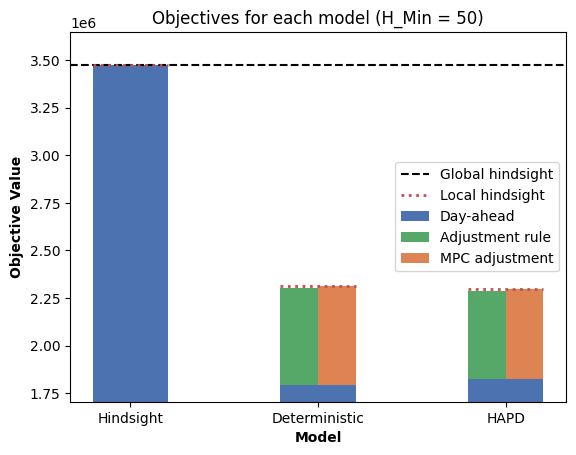

Model Hindsight_hmin100
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Deterministic_hmin100
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model HAPD_hmin100
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640


KeyboardInterrupt: 

In [18]:
for h_min in [50, 100, 150, 200]:
    hindsight_model = HindsightModel(f'Hindsight_hmin{h_min}', HOURS_PER_YEAR, h_min=h_min)
    deterministic_model = DeterministicModel(f'Deterministic_hmin{h_min}', HOURS_PER_YEAR, h_min=h_min)
    hapd_model = HAPDModel(f'HAPD_hmin{h_min}', HOURS_PER_YEAR, h_min=h_min)
    hapd_model.train(training_length=HOURS_PER_YEAR)
    models = [hindsight_model, deterministic_model, hapd_model]
    results = []

    for model in models:
        result = model.evaluate(HOURS_PER_YEAR)
        print(model.name)
        print(result.get_total_objective())
        results.append(result)
        
    total_results = []
    for model,result in zip(models, results):
        aux = [result, model.rule_based_adjustment(result), model.MPC_adjustment(result),model.best_adjustment(result)]
        total_results.append(aux)
        print(f"Model: {model.name} done")

    for model, result in zip(models, total_results):
        model.save_results(result[0], 'original')
        model.save_results(result[1], 'rule_based_adj')
        model.save_results(result[2], 'MPC_adj')
        model.save_results(result[3], 'best_adj')
    Result.plot_objectives(total_results, ['Hindsight', 'Deterministic', 'HAPD'],f'Objectives for each model (H_Min = {h_min})')

Model Hindsight_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model Deterministic_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Model HAPD_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Weights successfully loaded 
Set parameter Username
Academic license - for non-commercial use only - expires 2025-05-27
Hindsight_hmin200
1638002.9078431372
Deterministic_hmin200
1531048.256532939
HAPD_hmin200
1511789.7030119665
Model: Hindsight_hmin200 done
Model: Deterministic_hmin200 done
Model: HAPD_hmin200 done
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successfully.
Results saved successf

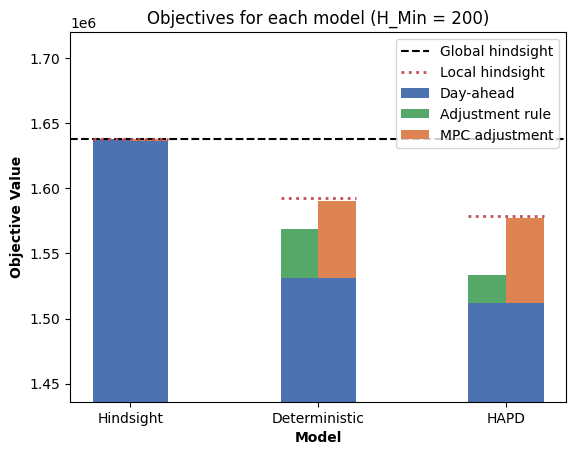

In [2]:
for h_min in [200]:
    hindsight_model = HindsightModel(f'Hindsight_hmin{h_min}', HOURS_PER_YEAR, h_min=h_min)
    deterministic_model = DeterministicModel(f'Deterministic_hmin{h_min}', HOURS_PER_YEAR, h_min=h_min)
    hapd_model = HAPDModel(f'HAPD_hmin{h_min}', HOURS_PER_YEAR, h_min=h_min)
    hapd_model.load_from_weights()
    models = [hindsight_model, deterministic_model, hapd_model]
    results = []

    for model in models:
        result = model.evaluate(HOURS_PER_YEAR)
        print(model.name)
        print(result.get_total_objective())
        results.append(result)
        
    total_results = []
    for model,result in zip(models, results):
        aux = [result, model.rule_based_adjustment(result), model.MPC_adjustment(result),model.best_adjustment(result)]
        total_results.append(aux)
        print(f"Model: {model.name} done")

    for model, result in zip(models, total_results):
        model.save_results(result[0], 'original')
        model.save_results(result[1], 'rule_based_adj')
        model.save_results(result[2], 'MPC_adj')
        model.save_results(result[3], 'best_adj')
    Result.plot_objectives(total_results, ['Hindsight', 'Deterministic', 'HAPD'],f'Objectives for each model (H_Min = {h_min})')

In [4]:
deterministic_models = [DeterministicModel('Deterministic_hmin50', HOURS_PER_YEAR, h_min=50), DeterministicModel('Deterministic_hmin100', HOURS_PER_YEAR, h_min=100), DeterministicModel('Deterministic_hmin150', HOURS_PER_YEAR, h_min=150), DeterministicModel('Deterministic_hmin200', HOURS_PER_YEAR, h_min=200)]

deterministic_results = []

for model in deterministic_models:
    results = [model.load_results(flag) for flag in ['original', 'rule_based_adj', 'MPC_adj', 'best_adj']]
    deterministic_results.append(results)    

Model Deterministic_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model Deterministic_hmin100
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Deterministic_hmin150
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Deterministic_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.


In [45]:
hindsight_models = [DeterministicModel('Hindsight_hmin50', HOURS_PER_YEAR, h_min=50), DeterministicModel('Hindsight_hmin100', HOURS_PER_YEAR, h_min=100), DeterministicModel('Hindsight_hmin150', HOURS_PER_YEAR, h_min=150), DeterministicModel('Hindsight_hmin200', HOURS_PER_YEAR, h_min=200)]

hindsight_results = []

for model in hindsight_models:
    results = [model.load_results(flag) for flag in ['original', 'rule_based_adj', 'MPC_adj', 'best_adj']]
    hindsight_results.append(results)    

Model Hindsight_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model Hindsight_hmin100
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model Hindsight_hmin150
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model Hindsight_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.


In [46]:
HAPD_models = [DeterministicModel('HAPD_hmin50', HOURS_PER_YEAR, h_min=50), DeterministicModel('HAPD_hmin100', HOURS_PER_YEAR, h_min=100), DeterministicModel('HAPD_hmin150', HOURS_PER_YEAR, h_min=150), DeterministicModel('HAPD_hmin200', HOURS_PER_YEAR, h_min=200)]

HAPD_results = []

for model in HAPD_models:
    results = [model.load_results(flag) for flag in ['original', 'rule_based_adj', 'MPC_adj', 'best_adj']]
    HAPD_results.append(results)    

Model HAPD_hmin50
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 50
Number of features: 6
Test start index: 8640
Model HAPD_hmin100
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 100
Number of features: 6
Test start index: 8640
Model HAPD_hmin150
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 150
Number of features: 6
Test start index: 8640
Model HAPD_hmin200
Nominal wind: 10
Max wind: 10
Max hydrogen: 10
H min: 200
Number of features: 6
Test start index: 8640
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
Results loaded successfully.
